## Python Packaging

for more info, see <https://packaging.python.org>

## Why Packaging?

Once you have started writing a few functions in a notebook, it quickly makes sense to put them in an extra file:

In [1]:
import matplotlib.pyplot as plt
import IPython

In [2]:
f = 2

In [3]:
def mypower(a):
    return a**f

In [4]:
mypower(2)

4

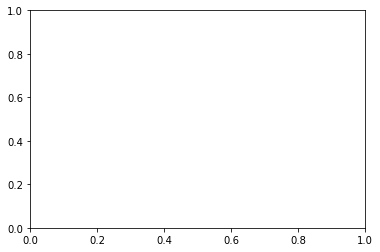

In [5]:
f, ax = plt.subplots()

In [6]:
mypower(2)

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'Figure'

# Simplest packaging 1

You put it in a file, e.g. `functions.py`. Upside:

- it's encapsuled: no cross-talk / name space overlap
- it cleans up your name space
- the file can be opened in an *IDE*: shows errors

<img src="image01.png" width=50% />

# Simplest packaging 2

**Upside** of this approach: **easy**

```python
from functions import mypower
```

**Downside** of this approach:

- it works only *locally*, or you need to put the file where python can find it.

Messy solution: use `PYTHONPATH`

# Simplest packaging 3

Directly in your shell, or e.g. your `.bashrc`:
```bash
export PYTHONPATH=/path/where/file/is:$PYTHONPATH
```

Or in python:

```python
import sys.env
sys.path.insert(0, '/path/where/file/is')
```

#### **But don't do that!**

# Better packaging

Make a package that can be installed

Basic idea:
    
- **`setup.py`** installs the package `myfuncs`
- **`__init__.py`** ... 
    - ... just needs to exist for python to realize that this folder is a package
    - ... is called whenever you import the package
    - ... can take care of 'arranging' the name space (see later)
    - ... could also contain the code in a simple case with no other files in the `myfuncs` folder

    /-|
      |- myfuncs/
      |  |- __init__.py
      |  |- functions.py
      |
      |- setup.py

# Even better

    /-|
      |- myfuncs/
      |  |- __init__.py
      |  |- functions.py
      |
      |- docs/
      |  |- ...
      |
      |- tests/
      |  |- ... 
      |
      |- setup.py
      |- README.md
      |- LICENSE
      |- MANIFEST.in
      |- requirements.txt

- **`README`**  
    - is typically a `.md` or `.rst`
    - is shown on the github website
    - can be included in the package description (see `setup.py`)
- **`LICENSE`**
    - choose your license (github or creative commons have help pages to pick a license)
    - is common but not required afaik
- **`requirements.txt`**  
    - is a simple requirements file, can also use `environment.yml`
    - is just a text file containing required packages, e.g. containing:
    
            matplotlib>=1.5.1
            numpy
            scipy=0.17.0
            -e git://github.com/birnstiel/XYZ.git#egg=XYZ        
            
- **MANIFEST.in**  
    is used to announce which files should
    be part of the package. Python files
    are included automatically, so here our `MANIFEST.in` should contain
    
        include Readme.md
        include LICENSE
        include doc/notebook.ipynb

# `setup.py`

from [packaging.python.org](https://packaging.python.org/tutorials/packaging-projects/):

```python
import setuptools

with open("README.md", "r", encoding="utf-8") as fh:
    long_description = fh.read()

setuptools.setup(
    name="example-pkg-YOUR-USERNAME-HERE", # Replace with your own username
    version="0.0.1",
    author="Example Author",
    author_email="author@example.com",
    description="A small example package",
    long_description=long_description,
    long_description_content_type="text/markdown",
    url="https://github.com/pypa/sampleproject",
    packages=setuptools.find_packages(),
    classifiers=[
        "Programming Language :: Python :: 3",
        "License :: OSI Approved :: MIT License",
        "Operating System :: OS Independent",
    ],
    python_requires='>=3.6',
)
```

### My example

In [7]:
IPython.display.Code(filename='../setup.py')

"""
Setup file for package `myfuncs`.
"""
from setuptools import setup
import pathlib

PACKAGENAME = 'myfuncs'

# the directory where this setup.py resides

HERE = pathlib.Path(__file__).absolute().parent

# function to parse the version from


def read_version():
    with (HERE / PACKAGENAME / '__init__.py').open() as fid:
        for line in fid:
            if line.startswith('__version__'):
                delim = '"' if '"' in line else "'"
                return line.split(delim)[1]
        else:
            raise RuntimeError("Unable to find version string.")


if __name__ == "__main__":

    setup(
        name=PACKAGENAME,
        description='my helper functions',
        version=read_version(),
        long_description=(HERE / "README.md").read_text(),
        long_description_content_type='text/markdown',
        url='https://github.com/birnstiel/' + PACKAGENAME.lower(),
        author='Til Birnstiel',
        author_email='til.birnstiel@lmu.de',
        license='GPLv3',
        packages=[PACKAGENAME],
        package_data={PACKAGENAME: [
            'data1/data.txt',
            'data2/data.txt',
        ]},
        include_package_data=True,
        install_requires=[
            'pytest',
            'numpy'],
        python_requires='>=3.6',
    )

## `__init__.py`

All python files in the folder `myfuncs` will be part of the package if a file named `__init__.py` exists, even if it is empty. Then our function is available as

```python
import myfuncs.functions.mypower
```

you can also change this in `__init__.py`, for example if you put:

```python
from .functions import mypower as fct

```

now there is

```python
import myfuncs
myfuncs.fct
myfuncs.functions.myfunc
myfuncs.functions.f
```

it is also good practice to define the version number here

```python
__version__ = '0.0.1'
```

it is also handy to define

```python
__all__ = ['fct']
```

in `__init__.py` which tells python that a `from myfuncs import *` imports only those functions in the list (here just `fct`).

so the entire `__init__.py` in our example is:

In [8]:
IPython.display.Code(filename='../myfuncs/__init__.py')

from .functions import mypower as fct
__version__ = '0.0.1'

__all__ = ['fct']

# Installation

### Full install

Now we can install it either by issuing (from the folder where `setup.py` resides:

    pip install .
    
This will install the package into your python distribution. Effectively it copies it there, in my case

    ~/anaconda3/lib/python3.8/site-packages/myfuncs/

Once that is done, you can `import myfuncs` in python from anyhwere.

### Development install

I install my packages always with:

    pip install -e .
    
This will install the package as well, but instead of **copying** it will **link to this folder**. In my case:

    ~/Dropbox/python-projects/toy-package/myfuncs/

So when you change the package after the install, those changes will be there if you (re-)`import myfuncs`.


In the 'full install', changes will only be in your distribution if you re-install it.

# PyPI

There is one more way to install this package that doesn't work yet:

    pip install myfunc
    
To do that, we need to have a user account on the **Py**thon **P**ackage **I**ndex ([pypi.org](https://pypi.org)) and upload our package there.


We will do that in a moment, but for details see

- [realpython.com: packaging](https://realpython.com/pypi-publish-python-package/)

- and also [realpython.com: wheels](https://realpython.com/python-wheels/)

To help us with this, we install `twine`.

To not pollute the package index, there is a testing area [test.pypi.org](https://test.pypi.org).

To create a source distribution we can upload, we can do

    python setup.py sdist
    
Twine can help us with some checks

    twine check dist/*
    
It's also worth unpacking that package to see if everything was included (otherwise it was missing in `MANIFEST.in`):

    tar tzf myfuncs-0.0.1.tar.gz

### Uploading (testing)

    twine upload --repository-url https://test.pypi.org/legacy/ dist/*
    
### Installing (testing)

    pip install -i https://test.pypi.org/simple/ myfuncs
    
### Uploading (<span style="color:red">real</span>)

    twine upload dist/*
    
### Installing (<span style="color:red">real</span>)

    pip install myfuncs

In [9]:
!jupyter nbconvert --to slides --post serve notebook.ipynb --SlidesExporter.reveal_scroll=True

[NbConvertApp] Converting notebook notebook.ipynb to slides
[NbConvertApp] Writing 618622 bytes to notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/notebook.slides.html
Use Control-C to stop this server
^C

Interrupted
